**Purpose**: To visually explore the data. This notebook answers questions about the participant demographics, the distribution of scores, and the relationships between variables using plots and charts.

# Step 1. Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")
print("Libraries imported and plot style set.")

# To display all columns
pd.set_option('display.max_columns',200) 

Libraries imported and plot style set.


# Step 2. Loading Cleaned Data

In [4]:
df = pd.read_csv('../data/processed_data/cleaned_hpv_data.csv')
print("Cleaned data loaded successfully.")

Cleaned data loaded successfully.


# Step 3. Visualizing Demographic Distributions 


--- Visualizing Demographic Information ---


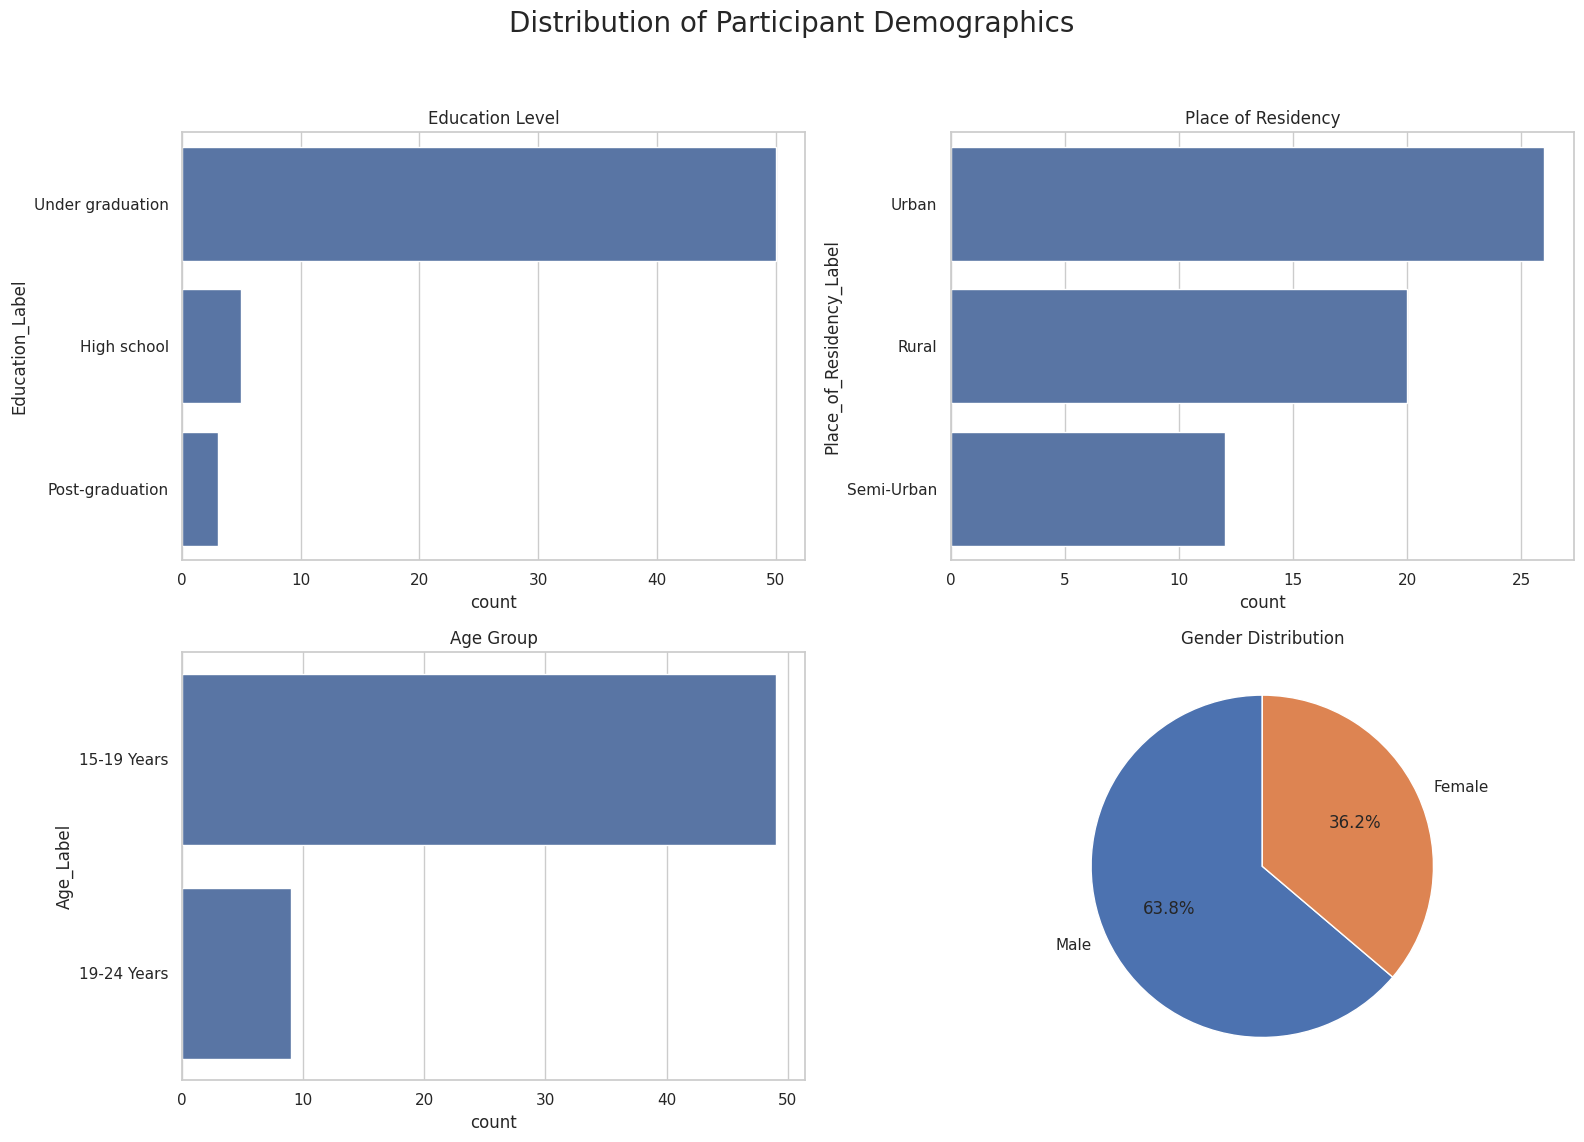

In [5]:
print("\n--- Visualizing Demographic Information ---")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Participant Demographics', fontsize=20)

sns.countplot(ax=axes[0, 0], y=df['Education_Label'], order=df['Education_Label'].value_counts().index)
axes[0, 0].set_title('Education Level')

sns.countplot(ax=axes[0, 1], y=df['Place_of_Residency_Label'], order=df['Place_of_Residency_Label'].value_counts().index)
axes[0, 1].set_title('Place of Residency')

sns.countplot(ax=axes[1, 0], y=df['Age_Label'], order=df['Age_Label'].value_counts().index)
axes[1, 0].set_title('Age Group')

gender_counts = df['Gender_Label'].value_counts()
axes[1, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Gender Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Step 4. Analyzing Pre-test vs. Post-test Scores


--- Visualizing Knowledge Score Improvement ---


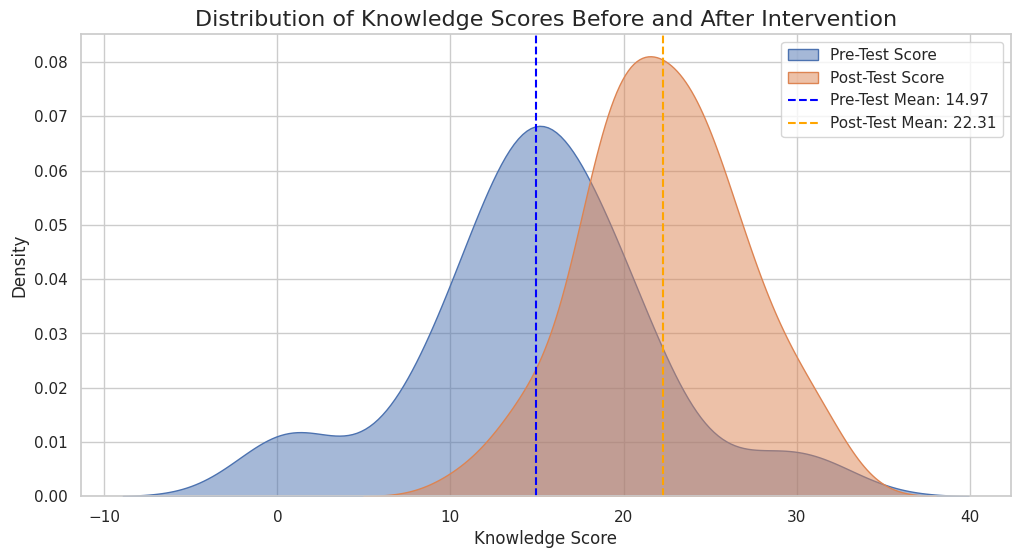

In [6]:
print("\n--- Visualizing Knowledge Score Improvement ---")
plt.figure(figsize=(12, 6))

sns.kdeplot(df['pre_test_score'], label='Pre-Test Score', fill=True, alpha=0.5)
sns.kdeplot(df['post_test_score'], label='Post-Test Score', fill=True, alpha=0.5)
plt.axvline(df['pre_test_score'].mean(), color='blue', linestyle='--', label=f"Pre-Test Mean: {df['pre_test_score'].mean():.2f}")
plt.axvline(df['post_test_score'].mean(), color='orange', linestyle='--', label=f"Post-Test Mean: {df['post_test_score'].mean():.2f}")

plt.title('Distribution of Knowledge Scores Before and After Intervention', fontsize=16)
plt.xlabel('Knowledge Score')
plt.ylabel('Density')
plt.legend()
plt.show()

# Step 5. Exploring Score Improvement by Demographics


--- Visualizing Score Improvement Across Demographics ---


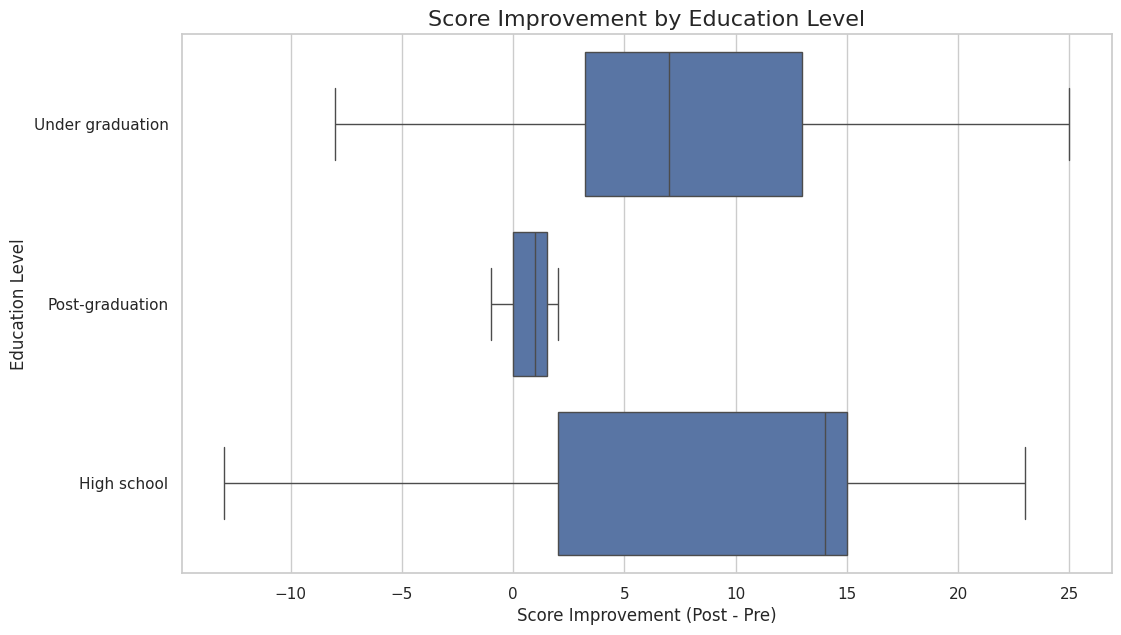

In [7]:
print("\n--- Visualizing Score Improvement Across Demographics ---")
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='score_improvement', y='Education_Label', orient='h')
plt.title('Score Improvement by Education Level', fontsize=16)
plt.xlabel('Score Improvement (Post - Pre)')
plt.ylabel('Education Level')
plt.show()

In [ ]:
import pickle
import pandas as pd
import os

def save_analysis_results(
    df_final,
    significance_results=None,
    correlation_df=None,
    association_df=None,
    coefficients=None,
    domains=None,
    demographic_maps=None,
    output_path="../data/processed_data/EDA_analysis_results.pkl"
):
    """
    To Save analysis artifacts for later use in reporting notebooks.
    """
    analysis_results = {
        "df_final": df_final,  # full cleaned dataset
        "significance_results": significance_results,
        "correlation_df": correlation_df,
        "association_df": association_df,
        "coefficients": coefficients,
        "domains": domains,
        "demographic_maps": demographic_maps
    }
    
    with open(output_path, "wb") as f:
        pickle.dump(analysis_results, f)
    
    print(f"Analysis results saved → {output_path}")
